# 政治人物選舉前後的字詞運用比較－－以林佳龍與盧秀燕為例   

目的: 延續作業01-03，將資料中林與盧的文章內文的所使用言詞做分析，看看有無選前選後言詞不一，或是討好選民的跡象。   
方法: 取林與盧FB的粉專貼文，分為兩類: 1-10月、11月至隔年1月，利用jieba, word2vec, PCA等方法，做出各字詞間的關聯性。

In [1]:
# 匯入程式庫
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os
import shutil

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 開啟檔案
def readFiles(name):
    row = pd.read_csv(name+'only'+'201801_data.csv', engine='python', encoding='utf-8')
    row.close()
    for i in range(2, 10):
        f = pd.read_csv(name+'only'+'20180'+str(i)+'_data.csv', engine='python', encoding='utf-8')
        row = row.append(f)
        f.close()
    for i in range(10, 13):
        f = pd.read_csv(name+'only'+'2018'+str(i)+'_data.csv', engine='python', encoding='utf-8')
        row = row.append(f)
        f.close()
    f = pd.read_csv(name+'only'+'201901_data.csv', engine='python', encoding='utf-8')
    row = row.append(f)
    return row

LinData = readFiles("林佳龍")
LuData = readFiles("盧秀燕")

先在前次作業篩選資料，儲存到HW04-06的檔案位置以方便讀取。   
清理資料時發現，除了林與盧自己的粉專內文是自己寫的，其他粉絲團都是轉發兩者的文章，所以這裡的檔案內容只包含林佳龍與盧秀燕自己粉專的貼文。

In [20]:
# 修改index，以理後續作業
LinData['Date'] = pd.to_datetime(LinData['Date'])
LinData.set_index(LinData['Date'], inplace=True)

print(LinData.shape)
LinData.head(3)

(718, 18)


,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
Date,,,,,,,,,,,,,,,,,,
2018-01-01 00:51:08,2018-01-01 00:51:08,林佳龍,153819538009272,NaN,photo,5675,5575,2,77,14,1,5,133,74,台中迎接2018花博年，在倒數聲中，我們與家人、情人、朋友度過興奮又感動的時刻。揮別2017...,Photos from 林佳龍's post,NaN,1514739068000
2018-01-01 11:54:27,2018-01-01 11:54:27,林佳龍,153819538009272,NaN,photo,3518,3414,1,45,30,3,24,114,60,2018年的第一天，我們回顧2017年的豐收，心中充滿感謝；並以歡喜的心迎接台中的花博年、捷...,NaN,NaN,1514778867000
2018-01-01 18:46:06,2018-01-01 18:46:06,林佳龍,153819538009272,NaN,video,2833,2765,3,42,15,1,7,142,64,豐收的2017年，嶄新的2018年，我們以感恩喜悅的心情，繼續往前邁進。\n\n2017年，...,NaN,NaN,1514803566000


In [21]:
LuData['Date'] = pd.to_datetime(LuData['Date'])
LuData.set_index(LuData['Date'], inplace=True)

print(LuData.shape)
LuData.head(3)

(836, 18)


,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
Date,,,,,,,,,,,,,,,,,,
2018-01-01 07:55:19,2018-01-01 07:55:19,盧秀燕,109391162488374,NaN,video,1787,1722,2,57,5,0,0,159,53,嗨！107年元旦快樂！🎉🎊🎈\n\n秀燕正參加升旗典禮。\n\n祝 #中華民國 \n#國運昌...,NaN,NaN,1514764519000
2018-01-01 08:55:19,2018-01-01 08:55:19,盧秀燕,109391162488374,NaN,video,849,816,0,27,5,0,1,62,42,嗨！107年元旦快樂！🎉🎊🎈\n\n秀燕正參加升旗典禮。\n\n祝 #中華民國 \n#國運昌...,NaN,NaN,1514768119000
2018-01-01 11:55:36,2018-01-01 11:55:36,盧秀燕,109391162488374,NaN,link,305,262,4,0,20,0,19,32,13,【補丁護照 「行」得通嗎？】\n\n為減少損失，外交部公開表示，用「防偽貼紙」處理錯印的...,護照用錯照片烏龍 外交部以防偽貼紙補救 | 政治 | 要聞 | 聯合新聞網,外交部發行新版晶片護照，但內頁卻出現與美國杜勒斯機場極雷同的照片，引發爭議，外交部晚上舉行記...,1514778936000


In [6]:
# print(type(LinData[0]['Message']))
# print(len(LinData))
# for i in range(len(LinData)):
#     print(len(LinData[i]['Message']))
# LinData[0]['Message']

In [5]:
# 匯入斷詞工具
#encoding=utf-8

import jieba
import re
import jieba.analyse

In [6]:
# 自定義斷詞檔案
prog = re.compile('[\s+\.\!\/_,$%^*(+\"\'-]+|[+——→！，。？：:；“”、~@#￥%……&*（）(\d+)「」『』《》【】│]+|[0-9]+|[a-z]', re.I)
jieba.load_userdict("userdict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.850 seconds.
Prefix dict has been built succesfully.


In [7]:
# 停用詞
stopWords = []
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [9]:
# result = prog.sub('', LinData[0]['Message'][3])
# result

In [91]:
# word = ''
# words = pd.Series(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# for i in range(len(LinData[1]['Message'])):    
#     if type(LinData[1]['Message'][i]) == str:
#         message = prog.sub('',LinData[1]['Message'][i])
#         word += message
#         words[2] = word
# words

In [90]:
# def getWord(n, words):
#     word = ''
#     for i in range(len(LinData[n]['Message'])):
#         if type(LinData[n]['Message'][i]) == str:
#             message = prog.sub('',LinData[n]['Message'][i])
#             message = re.sub('臺中', '台中', message)
#             message = re.sub('台中市', '台中', message)
#             message = re.sub('臺灣', '台灣', message)
#             word += message
#             words[n+1] = word
#     return words

# LinWords = pd.Series(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# for j in range(13):
#     getWord(j, LinWords)
# LinWords

In [12]:
# test = jieba.lcut(LinWords[1], cut_all=False)
# test

In [13]:
# jieba.analyse.extract_tags(str(test), topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn'))

In [96]:
# words01_10 = LinWords[0:10].str.cat()
# type(words01_10)
# words01_10

之前多做的很多麻煩的步驟

In [22]:
# 清理文字稿
m = prog.sub('',LinData['2018-01':'2018-10']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lin01_10 = re.sub('臺灣', '台灣', message)

# Lin01_10

In [18]:
jieba.analyse.extract_tags(Lin01_10, topK=20, withWeight=False, allowPOS=())

['台中',
 '我們',
 '佳龍',
 '台灣',
 '花博',
 '進步',
 '已經',
 '捷運',
 '綠川',
 '成為',
 '市府',
 '未來',
 '大家',
 '繼續',
 '發展',
 '一個',
 '因為',
 '邀請',
 '城市',
 '公車']

In [10]:
# 林佳龍 01~10 月的斷詞
seg_list_1 = jieba.cut(Lin01_10, cut_all=False)

# 移除停用詞及跳行符號
seg_list_1 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_1))

In [46]:
seg_list_1[0:10]

['台中', '迎接', '花博', '倒數聲', '中', '家人', '情人', '朋友', '度過', '興奮']

In [11]:
# 將斷詞存成 txt
path = "Lin's_201801_10.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_1)):
        f.write(seg_list_1[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [23]:
# 清理文字稿
m = prog.sub('',LinData['2018-11':'2019-01']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lin11_201901 = re.sub('臺灣', '台灣', message)

# Lin11_201901

In [16]:
jieba.analyse.extract_tags(Lin11_201901, topK=20, withWeight=False, allowPOS=())

['台中',
 '我們',
 '進步',
 '佳龍',
 '台灣',
 '花博',
 '大家',
 '林佳龍',
 '選擇',
 '直播',
 '已經',
 '謝謝',
 '時間',
 '延續',
 '一起',
 '未來',
 '感謝',
 '繼續',
 '一個',
 '市長']

In [108]:
# jieba.analyse.extract_tags(Lin11_201901, topK=50, withWeight=False, allowPOS=('ns', 'n', 'vn'))

以上兩者的計算速度差很多，有指定詞性的跑太久了，便不執行

In [14]:
# 林佳龍 11~隔年 1 月的斷詞
seg_list_2 = jieba.cut(Lin11_201901, cut_all=False)

# 移除停用詞及跳行符號
seg_list_2 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_2))

In [49]:
seg_list_2.index('中')

491

In [19]:
# 將斷詞存成 txt
path = "Lin's_201811_201901.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_2)):
        f.write(seg_list_2[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [16]:
import word2vec

In [69]:
# jieba分詞轉為word2vec向量
word2vec.word2vec("Lin's_201801_10.txt", "Lin's_201801_10.bin", size=300, verbose=True)
word2vec.word2vec("Lin's_201811_201901.txt", "Lin's_201811_201901.bin", size=300, verbose=True)

Starting training using file Lin's_201801_10.txt
Vocab size: 2182
Words in train file: 37669
Starting training using file Lin's_201811_201901.txt
Vocab size: 583
Words in train file: 7312


In [76]:
# 在高維向量空間(k=300)找出與所選字詞距離最接近的前10名
LinWord01_10 = word2vec.load("Lin's_201801_10.bin")
index1_1,metrics1_1 = LinWord01_10.cosine('台灣')
index1_2,metrics1_2 = LinWord01_10.cosine('台中')
index1_3,metrics1_3 = LinWord01_10.cosine('花博')
index1_4,metrics1_4 = LinWord01_10.cosine('佳龍')
index1_5,metrics1_5 = LinWord01_10.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])
 
# 所選字詞
index1_01 = np.where(LinWord01_10.vocab == '台灣')
index1_02 = np.where(LinWord01_10.vocab == '台中')
index1_03 = np.where(LinWord01_10.vocab == '花博')
index1_04 = np.where(LinWord01_10.vocab == '佳龍')
index1_05 = np.where(LinWord01_10.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index1_1 = np.append(index1_1,index1_01)
index1_2 = np.append(index1_2,index1_02)
index1_3 = np.append(index1_3,index1_03)
index1_4 = np.append(index1_4,index1_04)
index1_5 = np.append(index1_5,index1_05)

In [119]:
LinWord11_01 = word2vec.load("Lin's_201811_201901.bin")
index2_1,metrics2_1 = LinWord11_01.cosine('台灣')
index2_2,metrics2_2 = LinWord11_01.cosine('台中')
index2_3,metrics2_3 = LinWord11_01.cosine('花博')
index2_4,metrics2_4 = LinWord11_01.cosine('佳龍')
index2_5,metrics2_5 = LinWord11_01.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])

# 所選字詞
index2_01 = np.where(LinWord11_01.vocab == '台灣')
index2_02 = np.where(LinWord11_01.vocab == '台中')
index2_03 = np.where(LinWord11_01.vocab == '花博')
index2_04 = np.where(LinWord11_01.vocab == '佳龍')
index2_05 = np.where(LinWord11_01.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index2_1 = np.append(index2_1,index2_01)
index2_2 = np.append(index2_2,index2_02)
index2_3 = np.append(index2_3,index2_03)
index2_4 = np.append(index2_4,index2_04)
index2_5 = np.append(index2_5,index2_05)

In [72]:
from sklearn.decomposition import PCA
# zhfont = matplotlib.font_manager.FontProperties(fname='wqy-microhei.ttc')

In [89]:
# 引入上述將文章斷詞後轉為300維向量的資料
rawWordVec01 = LinWord01_10.vectors
rawWordVec02 = LinWord11_01.vectors

# 將原本300維向量空間降為2維
X_reduced01 = PCA(n_components=2).fit_transform(rawWordVec01)
X_reduced02 = PCA(n_components=2).fit_transform(rawWordVec02)

In [24]:
# 清理文字稿
m = prog.sub('',LuData['2018-01':'2018-10']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lu01_10 = re.sub('臺灣', '台灣', message)

# Lu01_10

In [25]:
m = prog.sub('',LuData['2018-11':'2019-01']['Message'].str.cat())
message = re.sub('臺中', '台中', m)
message = re.sub('台中市', '台中', message)
Lu11_01 = re.sub('臺灣', '台灣', message)

# Lu11_01

In [191]:
# 盧秀燕斷詞
seg_list_3 = jieba.cut(Lu01_10, cut_all=False)
seg_list_4 = jieba.cut(Lu11_01, cut_all=False)

# 移除停用詞及跳行符號
seg_list_3 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_3))
seg_list_4 = list(filter(lambda a: a not in stopWords and a != '\n', seg_list_4))

In [192]:
# 將斷詞存成 txt
path = "Lu's_201801_201810.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_3)):
        f.write(seg_list_3[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [193]:
path = "Lu's_201811_201901.txt"

with open(path, 'wb') as f:
    n = ['\n']
    for i in range(len(seg_list_4)):
        f.write(seg_list_4[i].encode('utf-8'))
        f.write(n[0].encode('utf-8'))

In [217]:
# jieba分詞轉為word2vec向量
word2vec.word2vec("Lu's_201801_201810.txt", "Lu's_201801_10.bin", size=300, verbose=True)
word2vec.word2vec("Lu's_201811_201901.txt", "Lu's_201811_201901.bin", size=300, verbose=True)

Starting training using file Lu's_201801_201810.txt
Vocab size: 1285
Words in train file: 24364
Starting training using file Lu's_201811_201901.txt
Vocab size: 429
Words in train file: 6988


In [218]:
# 在高維向量空間(k=300)找出與所選字詞距離最接近的前10名
LuWord01_10 = word2vec.load("Lu's_201801_10.bin")
index3_1,metrics3_1 = LuWord01_10.cosine('台灣')
index3_2,metrics3_2 = LuWord01_10.cosine('台中')
index3_3,metrics3_3 = LuWord01_10.cosine('花博')
index3_4,metrics3_4 = LuWord01_10.cosine('秀燕')
index3_5,metrics3_5 = LuWord01_10.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])
 
# 所選字詞
index3_01 = np.where(LuWord01_10.vocab == '台灣')
index3_02 = np.where(LuWord01_10.vocab == '台中')
index3_03 = np.where(LuWord01_10.vocab == '花博')
index3_04 = np.where(LuWord01_10.vocab == '秀燕')
index3_05 = np.where(LuWord01_10.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index3_1 = np.append(index3_1,index3_01)
index3_2 = np.append(index3_2,index3_02)
index3_3 = np.append(index3_3,index3_03)
index3_4 = np.append(index3_4,index3_04)
index3_5 = np.append(index3_5,index3_05)

In [219]:
# 在高維向量空間(k=300)找出與所選字詞距離最接近的前10名
LuWord11_01 = word2vec.load("Lu's_201811_201901.bin")
index4_1,metrics3_1 = LuWord11_01.cosine('台灣')
index4_2,metrics3_2 = LuWord11_01.cosine('台中')
index4_3,metrics3_3 = LuWord11_01.cosine('花博')
index4_4,metrics3_4 = LuWord11_01.cosine('秀燕')
index4_5,metrics3_5 = LuWord11_01.cosine('市長')
# print(word1[0])
# for word in word1[0]:
#     print(LinWord01_10.vocab[word])
 
# 所選字詞
index4_01 = np.where(LuWord11_01.vocab == '台灣')
index4_02 = np.where(LuWord11_01.vocab == '台中')
index4_03 = np.where(LuWord11_01.vocab == '花博')
index4_04 = np.where(LuWord11_01.vocab == '秀燕')
index4_05 = np.where(LuWord11_01.vocab == '市長')

# 將所選字詞與其最接近之前10名合併 
index4_1 = np.append(index4_1,index4_01)
index4_2 = np.append(index4_2,index4_02)
index4_3 = np.append(index4_3,index4_03)
index4_4 = np.append(index4_4,index4_04)
index4_5 = np.append(index4_5,index4_05)

In [220]:
# 引入上述將文章斷詞後轉為300維向量的資料
rawWordVec03 = LuWord01_10.vectors
rawWordVec04 = LuWord11_01.vectors

# 將原本300維向量空間降為2維
X_reduced03 = PCA(n_components=2).fit_transform(rawWordVec03)
X_reduced04 = PCA(n_components=2).fit_transform(rawWordVec04)

<IPython.core.display.Javascript object>


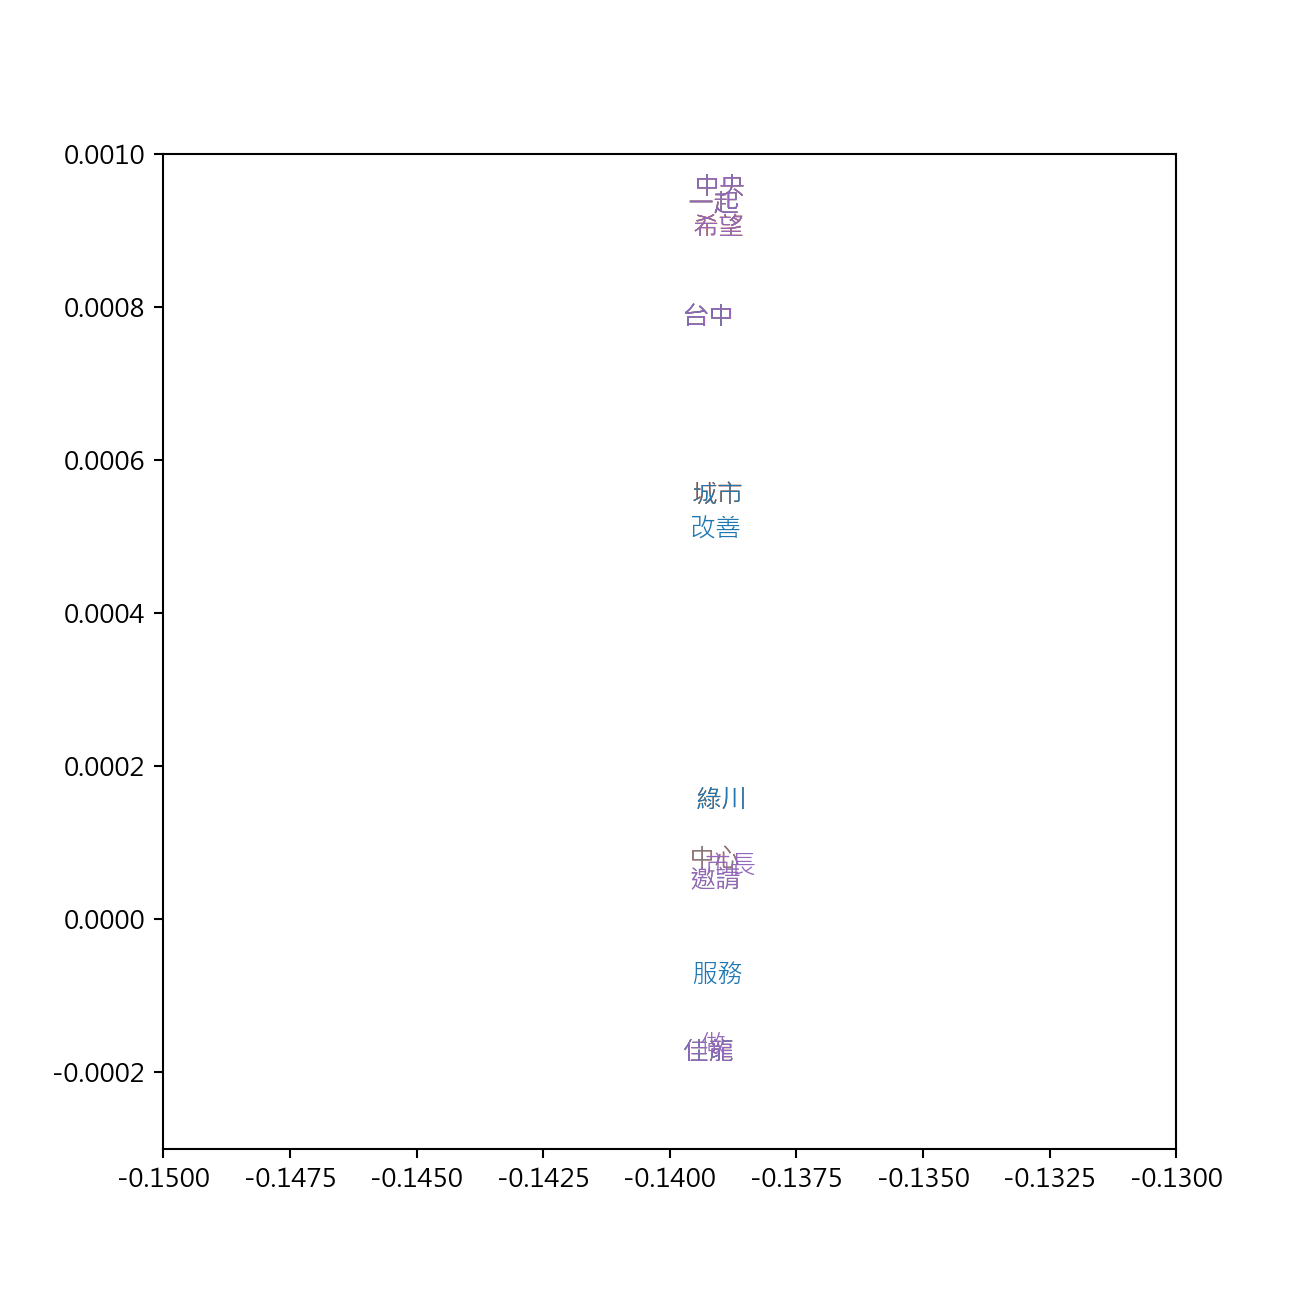

In [114]:
# 印出分析結果
fig01_10 = plt.figure(figsize=(6,6))
ax1 = fig01_10.add_subplot(111)
 
for i in index1_1:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C3')
for i in index1_2:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color= 'C1')
for i in index1_3:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C7')
for i in index1_4:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C0')
for i in index1_5:
    ax1.text(X_reduced01[i][0], X_reduced01[i][1], LinWord01_10.vocab[i], color='C4')

    ax1.axis([-0.15,-0.13,-0.0003,0.001])
plt.show(fig01_10)

<IPython.core.display.Javascript object>


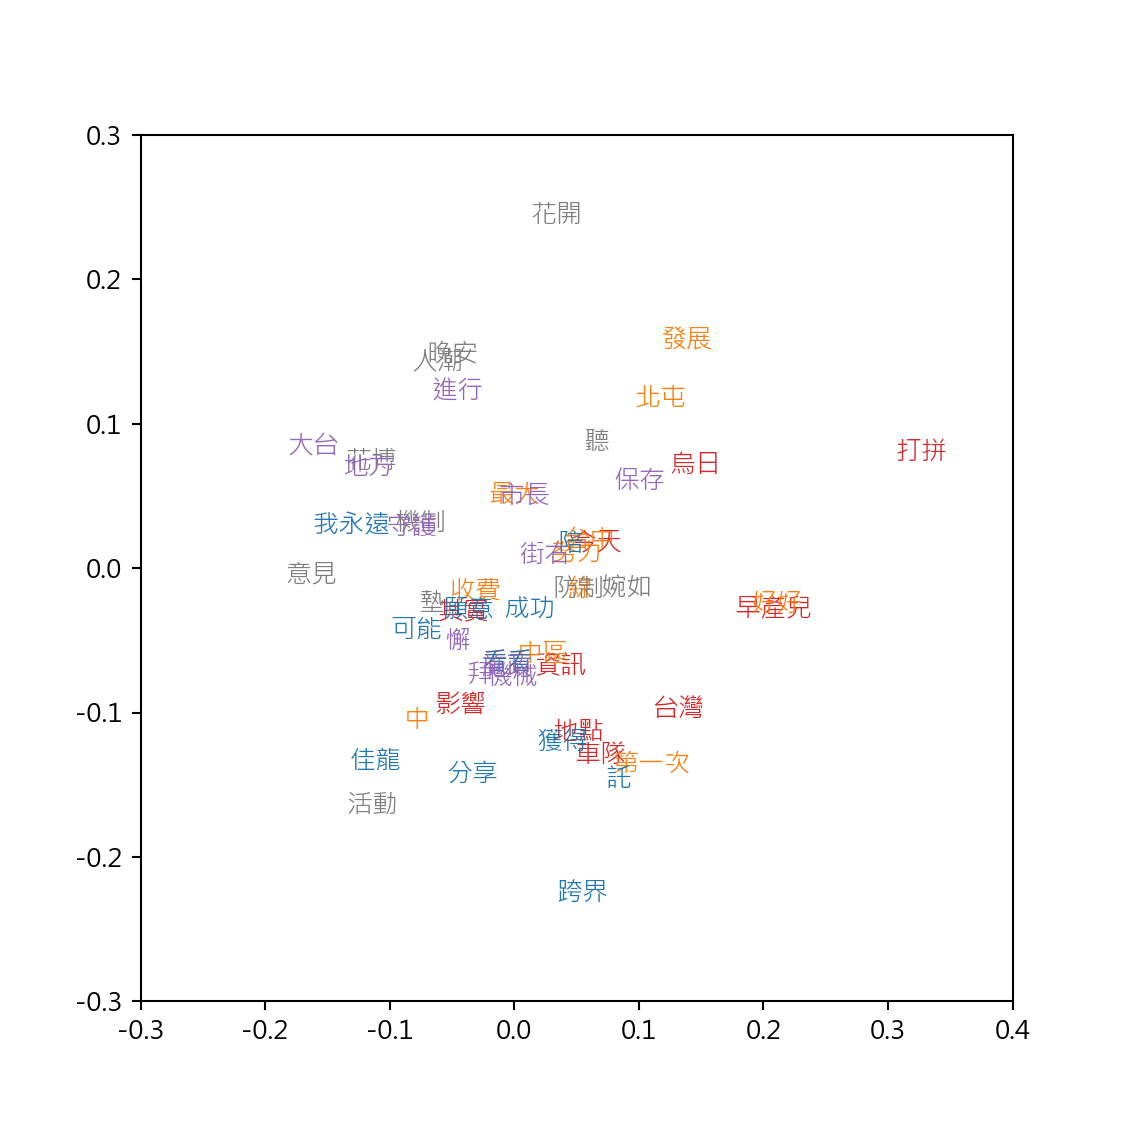

In [120]:
fig11_01 = plt.figure(figsize=(6,6))
ax = fig11_01.add_subplot(111)
 
for i in index2_1:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C3')
for i in index2_2:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color= 'C1')
for i in index2_3:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C7')
for i in index2_4:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C0')
for i in index2_5:
    ax.text(X_reduced02[i][0], X_reduced02[i][1], LinWord11_01.vocab[i], color='C4')

    ax.axis([-0.3,0.4,-0.3,0.3])
plt.show()

<IPython.core.display.Javascript object>


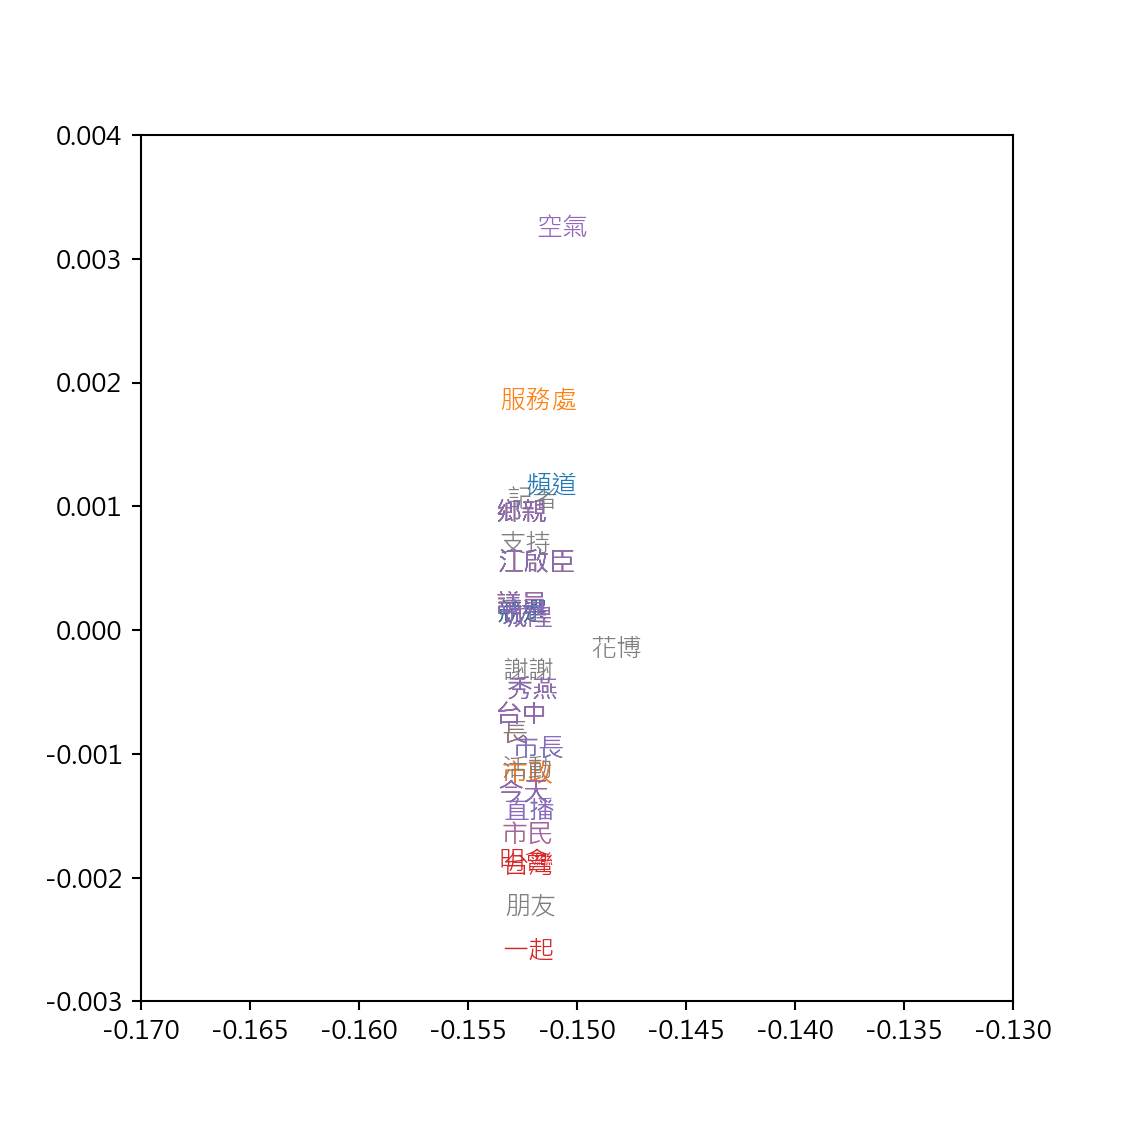

In [226]:
fig2_01_10 = plt.figure(figsize=(6,6))
ax3 = fig2_01_10.add_subplot(111)
 
for i in index3_1:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C3')
for i in index3_2:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color= 'C1')
for i in index3_3:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C7')
for i in index3_4:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C0')
for i in index3_5:
    ax3.text(X_reduced03[i][0], X_reduced03[i][1], LuWord01_10.vocab[i], color='C4')

    ax3.axis([-0.17,-0.13,-0.003,0.004])
plt.show(fig2_01_10)

<IPython.core.display.Javascript object>


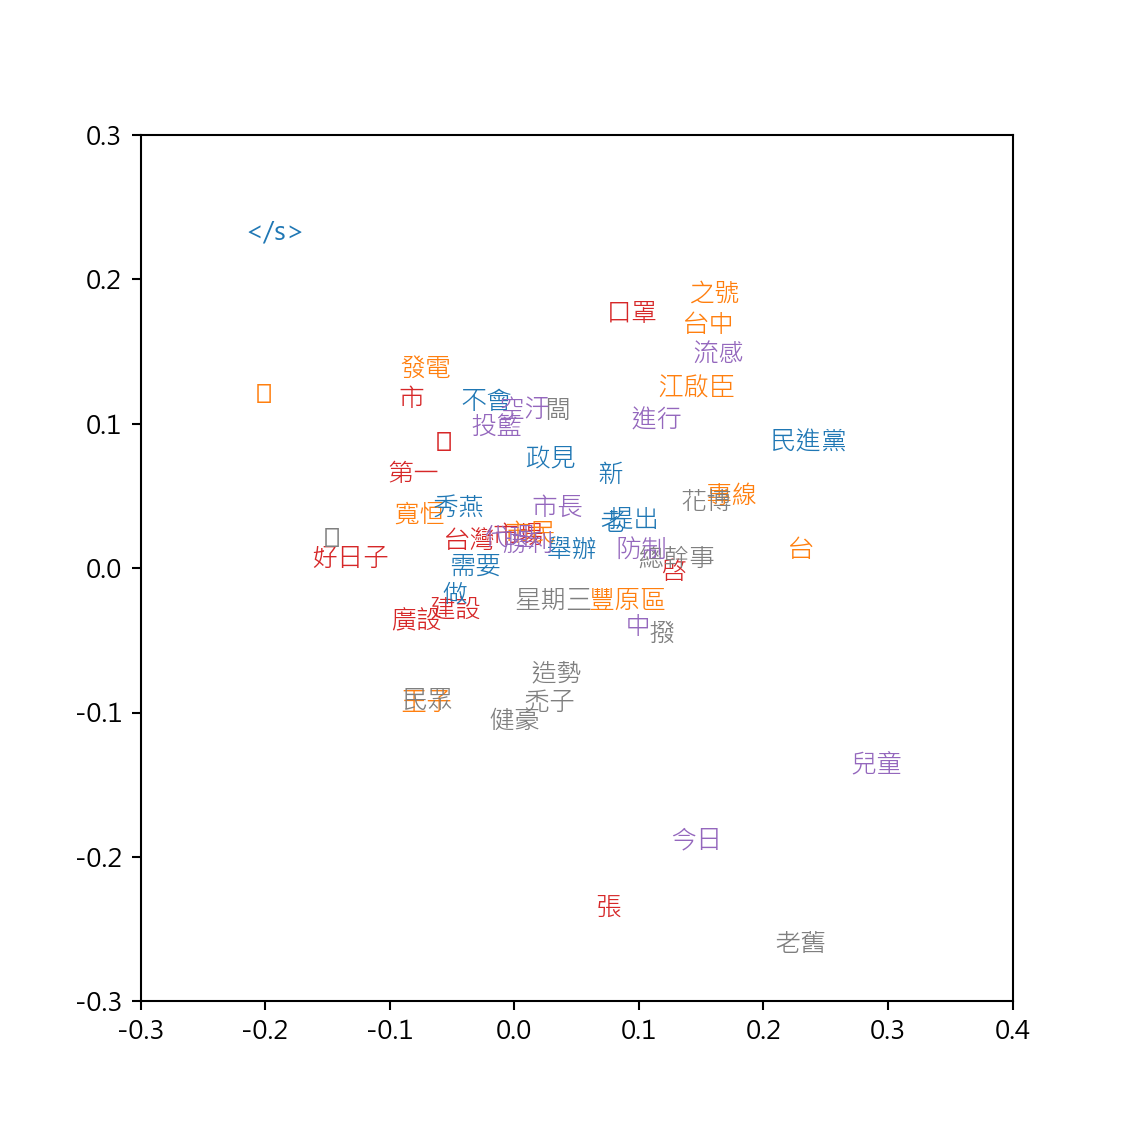

In [227]:
fig2_11_01 = plt.figure(figsize=(6,6))
ax4 = fig2_11_01.add_subplot(111)
 
for i in index4_1:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C3')
for i in index4_2:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color= 'C1')
for i in index4_3:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C7')
for i in index4_4:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C0')
for i in index4_5:
    ax4.text(X_reduced04[i][0], X_reduced04[i][1], LuWord11_01.vocab[i], color='C4')

    ax4.axis([-0.3,0.4,-0.3,0.3])
plt.show(fig2_11_01)

從圖得知，兩者在選前的詞彙關聯度滿大的，需要縮小很多範圍才能看得清楚，選後字詞就明顯分散。   

不過這次分析十分粗糙，原因(藉口)是期中考也好不容易考完後才有心力做作業，但為了要準備之後的專題而去看其他的分析方法，所以自定義詞類沒有好好寫完，盧秀燕的文章一大堆emoji也沒有刪除乾淨，所以分析結果很奇怪，有相當的誤差，不過在之後會以更嚴謹的方法去分析字詞。   

下面的圖原本是想繼續分析下去，比較按讚高的文章與按讚低的文章所用字詞的差異，雖然沒有執行下去，但還是以這張圖作結(林佳龍的聲量其實滿高的，不過還是輸盧秀燕，也許是其他因素有所影響)。

<IPython.core.display.Javascript object>


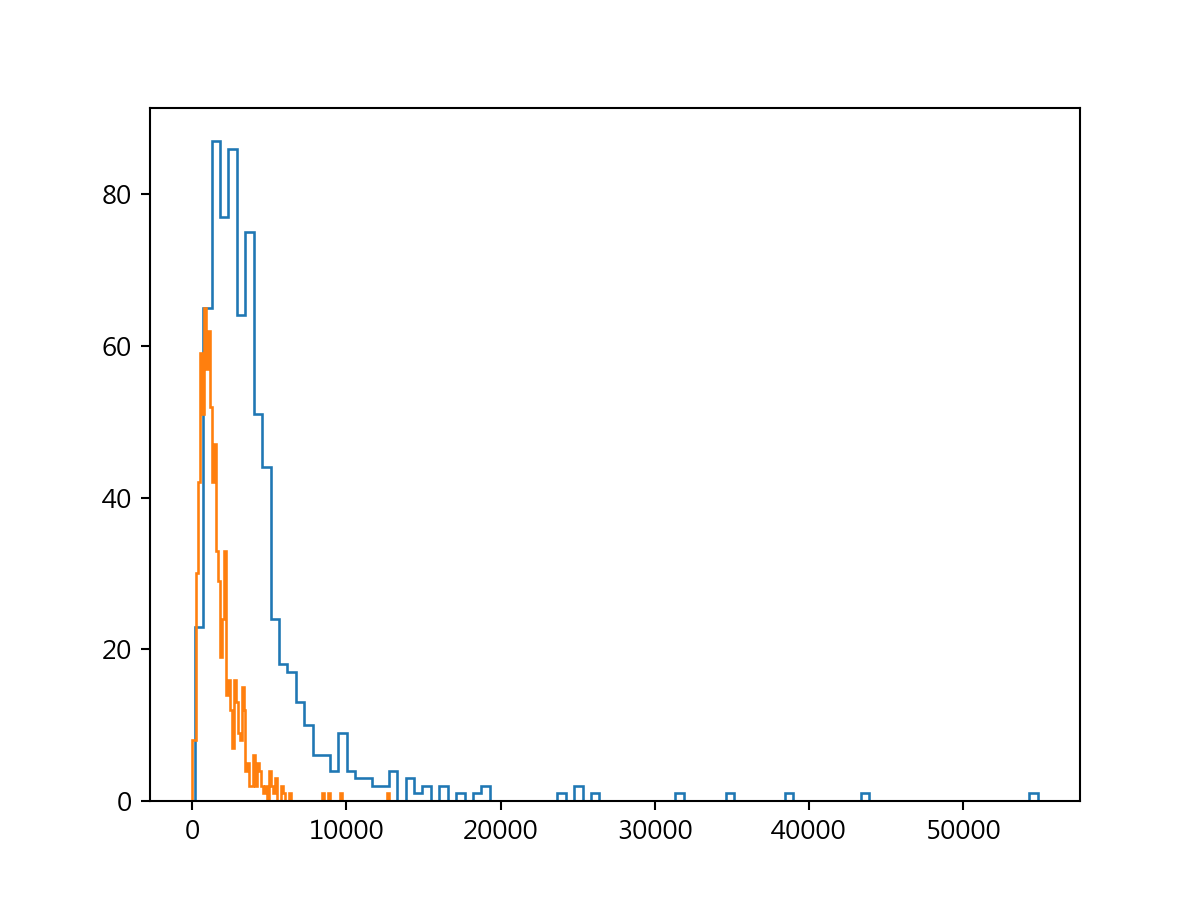

(array([ 8.,  8., 30., 42., 59., 51., 65., 57., 62., 52., 42., 47., 33.,
        29., 19., 24., 33., 14., 16., 12.,  7., 16., 13.,  9.,  8., 15.,
        12.,  4.,  5.,  2.,  2.,  6.,  2.,  5.,  4.,  2.,  1.,  2.,  0.,
         4.,  2.,  1.,  3.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.000000e+00, 1.318100e+02, 2.596200e+02, 3.874300e+02,
        5.152400e+02, 6.430500e+02, 7.708600e+02, 8.986700e+02,
        1.026480e+03, 1.154290e+03, 1.282100e+03, 1.409910e+03,
        1.537720e+03, 1.665530e+03, 1.793340e+03, 1.921150e+03,
        2.048960e+03, 2.176770e+03, 2.304580e+03, 2.432390e+03,
        2.560200e+03, 2.688010e+03, 2.815820e+03, 2.943630e+03,
        3.071440e+03, 3.199250e+03, 3.327060e+03, 

In [109]:
plt.hist(LinData['All_Reaction_Count'], bins=100, histtype='step')
plt.hist(LuData['All_Reaction_Count'], bins=100, histtype='step')